First trials to code a machine learning algorithm

In [1]:
import pandas as pd
import numpy as np
import import_data
import sort_data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

/Users/rossana13/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Load the data. We need full curves and one partial curve (that represents the user's curve)

Full_Curves = sort_data.by_cycle('converted_PL11.mat')
PL03c,PL03d = sort_data.charge_discharge('converted_PL03.mat')
full_curvesc,full_curved = sort_data.charge_discharge('converted_PL11.mat')



In [3]:
len(PL03c.keys())

1063

In [4]:
full_curved[102]

,time,datetime,step,cycle,current_amp,voltage,charge_ah,discharge_ah
216695,2.163534e+06,735844.463576,12.0,102.0,-0.000174,4.198788,144.094109,143.413566


In [5]:
full_curvesc[102]

,time,datetime,step,cycle,current_amp,voltage,charge_ah,discharge_ah
215663,2.153217e+06,735844.344167,10.0,102.0,0.750502,3.311980,142.684392,143.413566
215664,2.153227e+06,735844.344282,10.0,102.0,0.750320,3.349538,142.686483,143.413566
215665,2.153237e+06,735844.344398,10.0,102.0,0.750320,3.380296,142.688567,143.413566
215666,2.153247e+06,735844.344514,10.0,102.0,0.750502,3.407169,142.690652,143.413566
215667,2.153257e+06,735844.344630,10.0,102.0,0.750502,3.430804,142.692743,143.413566
215668,2.153267e+06,735844.344745,10.0,102.0,0.750502,3.452335,142.694827,143.413566
215669,2.153277e+06,735844.344861,10.0,102.0,0.750320,3.471761,142.696915,143.413566
215670,2.153287e+06,735844.344977,10.0,102.0,0.750139,3.489731,142.698999,143.413566
215671,2.153297e+06,735844.345093,10.0,102.0,0.750320,3.506567,142.701084,143.413566
215672,2.153307e+06,735844.345208,10.0,102.0,0.750320,3.521946,142.703175,143.413566


#plt.figure(figsize = (6, 6))
for i in range(1, len(discharge.keys()), 41):
    if i in discharge.keys():
        plt.plot((discharge[i]['time']-discharge[i]['time'].iloc[0]), discharge[i]['voltage'])
    else:
        pass
plt.title('Discharge Curves')
plt.show()

In [6]:
Cu = PL03c[10]['voltage']
x1 = np.linspace(1, len(Cu), num=len(Cu))

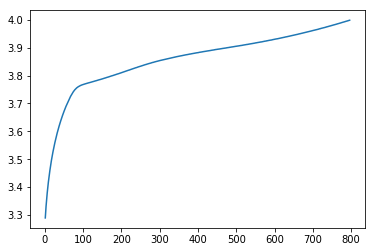

In [7]:
plt.plot(x1,Cu)

In [8]:
Cu = PL03d[10]['voltage']
x1 = np.linspace(1, len(Cu), num=len(Cu))

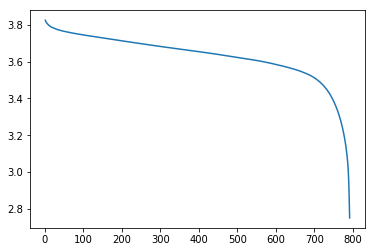

In [9]:
plt.plot(x1,Cu)

In [10]:
Fu = full_curved[10][['voltage']]
x2 = np.linspace(1, len(Fu), num=len(Fu))

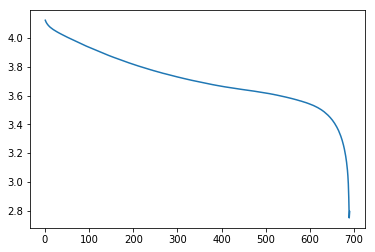

In [11]:
plt.plot(x2,Fu)

In [12]:
Fu = full_curvesc[10][['voltage']]
x2 = np.linspace(1, len(Fu), num=len(Fu))

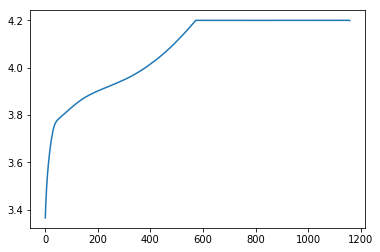

In [13]:
plt.plot(x2,Fu)

In [14]:
a = PL03c[444]['voltage'].values.flatten()

b = Full_Curves[1][['voltage']].values.flatten()

In [15]:
len(a)

802

In [16]:
len(b)

1175

In [24]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

a = PL03d[100]['voltage'].values.flatten()
b = full_curved[1][['voltage']].values.flatten()
distance,path = fastdtw(a, b, dist=euclidean)
print(distance)

21.55074954032898


In [25]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def curve_distance(a,b):
#Inputs are two nparray    
    distance,path = fastdtw(a, b, dist=euclidean)
    return distance

In [27]:
curve_distance(PL03d[100]['voltage'].values.flatten(),full_curved[1][['voltage']].values.flatten())

21.55074954032898

In [28]:
def distance_to_full(curve,dic):
#Inputs are one partial curve and a dictionary with full curves
    a = curve.values.flatten()
    Y = []
    
    for i in range(1,4): #Trial with random range
        if i in dic.keys():
            b = dic[i][['voltage']].values.flatten() 
            d = curve_distance(a,b)
            
            A = [i,d]
            Y.append(A)
        else:
            pass
    df = pd.DataFrame(Y, columns = ['Cycle','Distance'])
    df = df.sort_values(by = ['Distance'])
    return df

In [29]:
distance_to_full(PL03d[100]['voltage'],full_curved)

,Cycle,Distance
0,1,21.550750
1,2,21.803970
2,3,21.879198


In [40]:
def distance_to_full(curve,dic):
#Inputs are one partial curve and a dictionary with full curves
    a = curve.values.flatten()
    Y = []
    
    for i in range(1,len(dic.keys()) + 1):
        if i in dic.keys():
            b = dic[i][['voltage']].values.flatten()
            if len(b) > 100: #This is to mae sure the full curve has values (check curve 102, it has only 1 value) 
                d = curve_distance(a,b)
            
                A = [i,d]
                Y.append(A)
            else:
                pass
        else:
            pass
    df = pd.DataFrame(Y, columns = ['Cycle','Distance'])
    df = df.sort_values(by = ['Distance'])
    return df

In [41]:
distance_to_full(PL03d[1]['voltage'],full_curved)

,Cycle,Distance
395,400,0.579620
240,244,0.596118
375,380,0.609299
402,475,0.614392
254,258,0.617350
250,254,0.622014
433,506,0.622286
259,263,0.622513
252,256,0.623136
166,169,0.623744


In [36]:
Cu = PL03d[1]['voltage']
x1 = np.linspace(1, len(Cu), num=len(Cu))

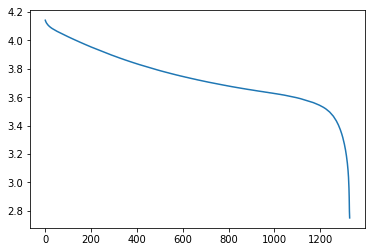

In [37]:
plt.plot(x1,Cu)

In [38]:
Fu = full_curved[400][['voltage']]
x2 = np.linspace(1, len(Fu), num=len(Fu))

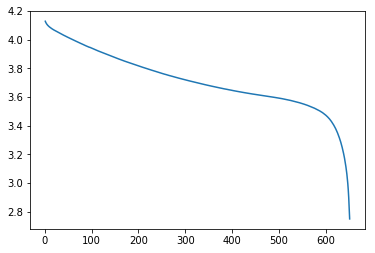

In [39]:
plt.plot(x2,Fu)

In [24]:
def Predict_Cycle(df):
    Cycle = df['Cycle'][df.index[0]]
    return Cycle

In [25]:
def KNN(curve,dic,t):
    df = distance_to_full(curve,dic)
    Cycle = Predict_Cycle(df)
    full_curve = dic[Cycle]
    
    corr_factor = t/10 #10 seconds is the measurements time in the full cycle data
    Cycle = Cycle*corr_factor
    return Cycle , full_curve

In [ ]:
KNN(PL03d[444]['voltage'],full_curved,5)

In [ ]:
KNN(PL03d[100]['voltage'],full_curved,5)